<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%EA%B0%9C%EC%A0%952%ED%8C%90_ch8_1~3_p_488_508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 분석

### 📌 NLP vs 텍스트 분석  

✅ NLP(Natural Language Processing)  
- 머신이 인간의 언어를 이해하고 해석하는 기술  
- 기계 번역, 질의응답 시스템 등 언어 해석 중심  
- 텍스트 분석을 향상하는 기반 기술  

✅ 텍스트 분석(Text Analytics, TA)  
- 비정형 텍스트에서 의미 있는 정보 추출  
- 텍스트 마이닝(Text Mining)이라고도 불림  
- 비즈니스 인텔리전스, 예측 분석 등에 활용  

### 📈 텍스트 분석의 주요 기술  
1️⃣ **텍스트 분류(Text Classification)**  
   - 문서를 특정 카테고리(예: 연예, 정치, 사회)로 자동 분류  
   - 스팸 메일 검출, 뉴스 분류 등에 활용 (지도학습)  

2️⃣ **감성 분석(Sentiment Analysis)**  
   - 텍스트에서 감정, 의견 등을 분석  
   - 소셜 미디어 감정 분석, 리뷰 분석 등 (지도/비지도학습)  

3️⃣ **텍스트 요약(Summarization)**  
   - 중요한 주제나 중심 내용을 추출  
   - 토픽 모델링(Topic Modeling) 활용  

4️⃣ **텍스트 군집화(Clustering) & 유사도 측정**  
   - 비슷한 문서끼리 그룹화 (비지도학습)  
   - 문서 간 유사도 계산  

-> 머신러닝 발전으로 NLP와 텍스트 분석이 더욱 정교해짐!  

## 📌 텍스트 분석 프로세스  

✅ 텍스트 분석 개요  
- 비정형 텍스트 데이터를 머신러닝 모델에 적용하려면 **피처 벡터화(Feature Vectorization)** 과정이 필요  
- 주요 방법: **BOW(Bag of Words)**, **Word2Vec** (이 책에서는 BOW 설명)  

📈 텍스트 분석 수행 프로세스  
1️⃣ **텍스트 전처리**  
   - 클렌징(특수문자 제거, 대/소문자 변경)  
   - 토큰화(Tokenization)  
   - 불용어(Stopword) 제거  
   - 어근 추출(Stemming/Lemmatization)  

2️⃣ **피처 벡터화/추출**  
   - 텍스트에서 피처(단어) 추출 후 벡터 값 할당  
   - **BOW(Bag of Words)**: Count 기반, TF-IDF 기반 벡터화  

3️⃣ **ML 모델 적용**  
   - 벡터화된 데이터를 머신러닝 모델에 적용  
   - 학습, 예측, 평가 수행  

## 02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

 - 텍스트를 머신러닝/NLP 모델의 입력 데이터로 사용하기 위한 사전 처리 과정  
- 주요 작업: **클렌징, 토큰화, 불용어 제거, 어근화(Stemming/Lemmatization)**  

### 📈 주요 텍스트 정규화 작업  
1️⃣ **클렌징(Cleansing)**  
   - 불필요한 문자, 기호, HTML/XML 태그 제거  

2️⃣ **토큰화(Tokenization)**  
   - **문장 토큰화**: 문장을 마침표(`.`), 개행 문자(`\n`) 등을 기준으로 분리  
   - **단어 토큰화**: 문장에서 단어 단위로 분리  

3️⃣ **불용어(Stopword) 제거 & 철자 수정**  
   - 분석에 불필요한 단어 제거  
   - 철자 오류 수정  

4️⃣ **어근화(Stemming & Lemmatization)**  
   - **Stemming**: 단순 규칙 기반 단어 변환 (예: "running" → "run")  
   - **Lemmatization**: 문맥을 고려한 원형 변환 (예: "better" → "good")  

### 🛠 NLTK 활용 예제  
- `nltk.sent_tokenize()` → 문장 토큰화 수행  
- `nltk.download('punkt')` → 필요한 데이터 세트 다운로드  



In [1]:
from nltk import sent_tokenize
import nltk

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


📌 단어 토큰화 (Word Tokenization)

✅ 개요  
- **단어 토큰화**는 문장을 단어 단위로 분리하는 과정  
- 기본적으로 **공백, 콤마(,), 마침표(.), 개행문자** 등으로 단어를 분리  
- 정규 표현식을 사용하여 다양한 방식으로 토큰화 가능  

📈 사용 예시  
- **단어 순서가 중요한 경우**: 문장 내 의미가 중요한 경우 문장 토큰화 사용  
- **Bag of Words**와 같은 경우 **단어의 순서가 중요하지 않다면 단어 토큰화만 사용**하면 충분  

🛠 NLTK의 `word_tokenize()` 활용  
- `word_tokenize()`를 사용하여 문장을 단어 단위로 토큰화할 수 있음  

In [4]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


📌 문서 단어 토큰화 (문장별 단어 토큰화)

✅ 개요  
- `sent_tokenize()`로 문서 내 문장 분리 후, 각 문장에 대해 `word_tokenize()`로 단어 단위로 토큰화  
- 이를 통해 문서 전체를 단어 토큰화할 수 있음  

🛠 **`tokenize_text()` 함수**  
- 문서를 문장별로 나눈 뒤, 각 문장을 단어별로 토큰화하는 함수 생성  
- **순서**:  
  1. 문서 → 문장 분리 (`sent_tokenize()`)  
  2. 각 문장 → 단어 토큰화 (`word_tokenize()`)  


In [5]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text) :
  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


📌 n-gram을 활용한 토큰화

✅ 개요  
- **n-gram**: 연속된 n개의 단어를 하나의 토큰으로 묶는 방법  
- 문장을 단어별로 토큰화하면 문맥적인 의미를 놓치기 때문에, n-gram을 사용하여 연속된 단어들을 하나의 단위로 묶어 문맥을 유지  

📈 예시 (2-gram, bigram)  
- 문장: “Agent Smith knocks the door”  
- 2-gram (bigram):  
  - (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)  

🛠 n-gram 방식  
- **윈도우 크기(n)**를 정해 연속된 단어들을 묶어 문맥을 반영한 토큰화 수행


📌 스톱 워드 제거

✅ 개요  
- **스톱 워드 (Stop word)**: 분석에 큰 의미가 없는 단어들 (예: is, the, a, will 등)  
- 이 단어들은 문법적인 특성으로 자주 등장하지만 문맥상 중요하지 않기 때문에 제거가 필요  
- **목적**: 의미 없는 단어들을 제거하여 중요한 단어들이 더 잘 인식되도록 도움  

🛠 NLTK의 스톱 워드 목록  
- NLTK는 다양한 언어의 스톱 워드를 제공하며, 이를 다운로드해 사용할 수 있음  
- 먼저 **NLTK의 stopwords 목록**을 내려받아 확인 가능


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
print('영어 stop words 개수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


- NLTK 스톱 워드는 198개이며, 필터링을 통해 의미 있는 단어만 추출 가능

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

all_tokens = []

# 예제 word_tokens가 정의되어 있어야 합니다.
for sentence in word_tokens:
    filtered_words = []
    for word in sentence:
        word = word.lower()  # 소문자로 변환
        if word not in stop_words:  # 스톱 워드 제거
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


-  is, this와 같은 스톱 워드가 필터링을 통해 제거됐음

## Stemming vs Lemmatization

: 단어의 원형을 찾는 두 가지 기법

### 🔹 Stemming
- 단순 규칙 기반 변환  
- 일부 철자가 손실될 수 있음  
- 예: `working` → `work`, `better` → `bet`

### 🔹 Lemmatization
- 품사와 의미를 고려한 변환  
- 보다 정확하지만 처리 속도가 느림  
- 예: `better` → `good`, `went` → `go`

### 🔹 NLTK에서 제공하는 도구
- **Stemming**: `PorterStemmer`, `LancasterStemmer`, `SnowballStemmer`
- **Lemmatization**: `WordNetLemmatizer`


In [12]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- Stemming: 단어의 접미사를 제거하여 원형을 찾지만, 문법적 의미를 고려하지 않아 정확하지 않을 수 있음.

- Lemmatization: 품사 정보를 고려하여 의미 있는 원형 단어를 정확히 찾아냄. 품사에 맞는 파라미터를 입력해야 더 정교한 결과를 얻을 수 있음.

예시:

work는 Stemming과 Lemmatization 모두 work로 인식.

amuse는 Stemming에서는 정확한 원형을 찾지 못하지만, Lemmatization에서는 품사에 맞게 정확한 원형을 찾아냄.

In [13]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Lemmatizer 객체 생성
lemma = WordNetLemmatizer()

# Lemmatize 예제
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


- 앞의 Stemmer보다 정확하게 원형 단어를 추출해줌

## 03 Bag of Words — BOW

- **Bag of Words (BOW)** 모델은 문서 내 모든 단어의 빈도를 계산하여 피처로 추출.
- 문맥이나 순서를 무시하고 단어의 빈도만을 고려.
- "봉투 안에 단어를 넣고 섞는" 방식으로, 단어들의 순서와 관계 없이 단어의 빈도에만 초점.


1. **중복 제거 및 단어 인덱스 부여**: 두 문장에서 중복된 단어를 제거하고, 각 단어에 고유 인덱스를 부여.
   - 예: 'and': 0,'baseball': 1, 'daughter':2, 'games':3, 'likes':4,'my':5, 'play': 6,'to': 7,'too': 8,
 'watch': 9,'wife': 10

2. **단어 출현 횟수 기록**: 각 문장에서 단어가 나타나는 횟수를 세어 해당 단어 인덱스에 기재.
   - 예: 'baseball'은 문장 1과 2에서 2번 등장, 'daughter'는 문장 1에서만 1번 등장.


### BOW 모델의 장점
- **쉽고 빠른 구축**: 단어 발생 횟수에 기반해 문서의 특징을 잘 나타낼 수 있음.
- **높은 활용도**: 전통적으로 여러 분야에서 널리 사용됨.

### BOW 모델의 단점
- **문맥 의미 반영 부족**: 단어 순서를 고려하지 않아 문맥적인 의미가 무시됨. n-gram 기법으로 일부 보완 가능하지만, 한계가 있음.
- **희소 행렬 문제**: 많은 단어가 포함된 희소 행렬이 생성되며, 대부분의 값이 0이 되어 ML 성능에 부정적인 영향을 미침.


### BOW 피처 벡터화
- **피처 벡터화**: 텍스트 데이터를 숫자형 벡터로 변환하여 머신러닝 알고리즘에 입력 가능하게 만드는 과정.
- **변환 과정**: 문서에서 단어를 추출하여 발생 빈도를 값으로 부여한 벡터로 변환.
- **결과**: 모든 문서에서 추출된 단어로 구성된 피처 벡터 세트를 생성하고, 이를 기반으로 M x N 형태의 행렬을 구성.


### BOW 피처 벡터화 방식
1. **카운트 기반 벡터화**: 문서에서 단어의 등장 횟수를 단순히 카운트하여 값을 부여. 자주 등장하는 단어에 높은 값을 부여하지만, 문서의 특징을 제대로 반영하지 못할 수 있음.
2. **TF-IDF 기반 벡터화**: 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 전체 문서에서 자주 등장하는 단어에 대해 페널티를 주어 중요도를 조정. 문서의 특성을 잘 반영하고 예측 성능을 개선하는 데 유리.


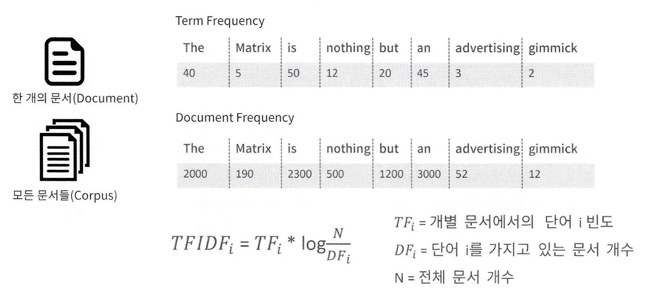

### 사이킷런의 CountVectorizer 및 TF-IDF 벡터화
- **CountVectorizer**: 카운트 기반 벡터화를 구현하는 클래스. 텍스트 전처리(소문자 변환, 토큰화, 스톱 워드 필터링 등)와 피처 벡터화 수행
- 주요 파라미터:
  - **max_df**: 문서에서 너무 자주 등장하는 단어를 제외
  - **min_df**: 빈도가 너무 낮은 단어를 제외
  - **max_features**: 추출할 피처의 개수 제한
  - **stop_words**: 스톱 워드 지정 (예: 'english')
  - **n_gram_range**: n-그램 범위 설정 (예: (1, 2)로 단어와 2개씩 묶은 쌍)
  - **analyzer**: 토큰화 단위 설정 (기본값: 'word')
  - **token_pattern**: 토큰화 패턴 설정
  - **tokenizer**: 커스텀 토큰화 함수 적용


### CountVectorizer 클래스 사용법 요약
1. **전처리 작업**: 영어 텍스트의 경우, 모든 문자를 소문자로 변환하는 등의 전처리 수행
2. **n-gram 기반 토큰화**: 기본적으로 단어 기준으로 n-gram 범위를 설정하여 단어를 토큰화
3. **정규화**: 텍스트를 정규화하여 처리
4. **스톱 워드 필터링**: `stop_words='english'`로 영어 스톱 워드를 필터링 가능
5. **어근 변환**: Stemming 및 Lemmatization은 직접 지원하지 않지만, `tokenizer` 파라미터에 커스텀 함수를 적용하여 처리 가능
6. **피처 벡터화**: `max_df`, `min_df`, `max_features` 등을 활용해 단어 빈도수 벡터 값을 추출


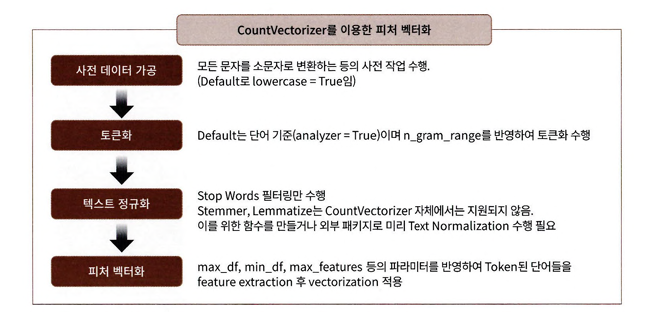

### BOW 벡터화 및 희소 행렬
- **희소 행렬(Sparse Matrix)**: BOW 벡터화 후 생성되는 행렬은 대부분 0으로 채워지는 특성을 가집니다. 이 행렬은 매우 큰 피처 수를 가질 수 있지만, 각 문서에서 사용되는 단어의 수는 제한적이므로 많은 0 값이 포함됩니다.
- **CSR 형식**: 희소 행렬의 계산 효율성을 위해 일반적으로 CSR(Compressed Sparse Row) 형식이 사용됩니다. CSR은 메모리 공간을 효율적으로 사용하고, 데이터 액세스 시간을 줄이는 데 유리합니다.


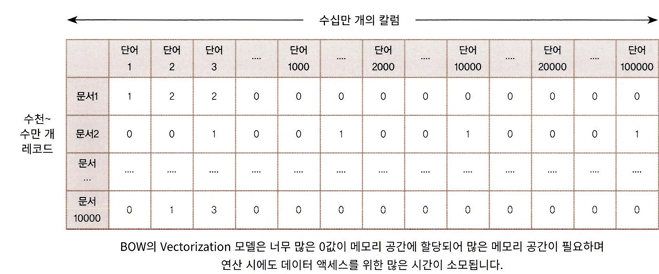

### COO 형식 (Coordinate Format)
- **COO 형식**: 희소 행렬에서 0이 아닌 값만 저장하고, 그 값들이 위치하는 행(row)과 열(column)을 별도의 배열에 저장하는 방식입니다.
  - 예시: 행렬 [[3, 0, 1], [0, 2, 0]]을 COO 형식으로 저장하면 0이 아닌 값은 [3, 1, 2], 행 위치는 [0, 0, 1], 열 위치는 [0, 2, 1]로 저장됩니다.
- **사이파이(Scipy)**: 파이썬에서 희소 행렬을 COO 형식으로 변환할 때 주로 사용하는 라이브러리입니다.


In [14]:
import numpy as np
from scipy.sparse import coo_matrix

# 밀집 행렬
dense = np.array([[3, 0, 1], [0, 2, 0]])

- 밀집 행렬을 COO 형식의 희소 행렬로 변환하려면, 0이 아닌 값들의 데이터 배열, 해당 값들의 행 위치 배열, 열 위치 배열을 각각 생성하여 coo_matrix()에 입력

In [15]:
from scipy import sparse
import numpy as np

# 0이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치 배열 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [16]:
sparse_coo.toarray() #  toarray() 메서드를 이용해 다시 밀집 형태의 행렬로 출력

array([[3, 0, 1],
       [0, 2, 0]])

- 다시 원래의 데이터 행렬로 추출됨

### 희소 행렬 - CSR 형식

CSR(Compressed Sparse Row) 형식은 COO 형식의 비효율적인 반복적인 위치 데이터를 해결하기 위한 방법. CSR 형식은 **행별로 값, 열 인덱스, 행 포인터** 배열을 사용하여 데이터를 저장함. 이를 통해 행렬의 구조를 더 효율적으로 저장할 수 있음.

**COO 형식의 문제점**: 행과 열의 위치를 나타내는 데이터가 중복되기 때문에 비효율적일 수 있음.

**CSR 형식의 장점**: 위치 정보의 중복을 없애고 저장 공간을 절약하며 계산 성능을 향상시킴.

- **COO**: 위치를 (row, col) 쌍으로 표현하여 데이터를 저장.
- **CSR**: 행별로 값, 열 인덱스, 행 포인터를 저장하여 더 효율적으로 데이터를 표현.


### CSR 형식으로 변환

CSR(Compressed Sparse Row) 형식은 **행 위치 배열**에서 고유 값의 **시작 위치만** 기록하여 메모리 공간을 절약하는 방법

**예시 배열**: [ [0, 0, 1, 0, 0, 5], [1, 4, 0, 3, 2, 5], [0, 6, 0, 3, 0, 0], [2, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 8], [1, 0, 0, 0, 0, 0] ]


- **데이터 배열**: [1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1]
- **행 위치 배열**: [0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5]
- **열 위치 배열**: [2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0]

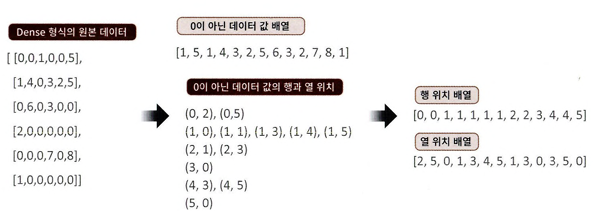


**변환 과정**:
- **행 위치 배열의 고유 값 시작 위치**만 저장: [0, 2, 7, 9, 10, 12]
- **최종 배열**: [0, 2, 7, 9, 10, 12, 13] (데이터 항목의 총 개수 추가)

CSR 형식은 행 위치 배열에서 고유 값의 시작 위치만 기록하기 때문에 메모리 공간을 절약하고 빠른 연산이 가능

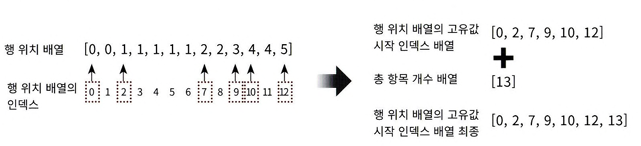

### CSR 방식 변환

CSR 방식의 변환은 **사이파이의 `csr_matrix`** 클래스를 사용하여 쉽게 할 수 있습니다.

**변환 방법**:
1. 0이 아닌 데이터 배열
2. 열 위치 배열
3. 행 위치 배열의 고유 값 시작 위치 배열

이 세 가지를 **`csr_matrix`** 생성 파라미터로 입력하면 됨

In [19]:
from scipy import sparse
import numpy as np

# 밀집 행렬(dense2) 정의
dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, (row_pos, col_pos)), shape=dense2.shape)

# COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
print('COO 변환된 데이터:')
print(sparse_coo.toarray())

# CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
print('CSR 변환된 데이터:')
print(sparse_csr.toarray())

COO 변환된 데이터:
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터:
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [20]:
import numpy as np
from scipy import sparse

# 수정된 밀집 행렬
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

# COO 형식으로 변환
coo = sparse.coo_matrix(dense3)

# CSR 형식으로 변환
csr = sparse.csr_matrix(dense3)

# 결과 출력 (COO와 CSR로 변환된 행렬)
print("COO 형식:")
print(coo.toarray())  # COO 형식에서 Dense로 변환하여 출력
print("\nCSR 형식:")
print(csr.toarray())  # CSR 형식에서 Dense로 변환하여 출력

COO 형식:
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]

CSR 형식:
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


- 사이킷런의 CountVectorizer나 TfidfVectorizer 클래스는 텍스트 데이터를 피처 벡터화할 때 사이파이의 CSR 형태로 희소 행렬을 반환